In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Decennial Census of Population and Housing

### Aggregate and Calculate Proportions

In [23]:
states = pd.read_csv('states.csv')
states.head()

,Unnamed: 0,total,nonhispanic,white,black,aian,asian,pacific,other,multiracial,hispanic,hispanic_white,hispanic_black,hispanic_aian,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
0,Alabama,4779736,4594134,3204402,1244437,25907,52937,1976,4030,60445,185602,70992,6874,2311,658,1081,92880,10806
1,Alaska,710231,670982,455320,21949,102556,37459,7219,1111,45368,39249,18256,1314,2315,676,190,9991,6507
2,Arizona,6392017,4496868,3695647,239101,257426,170509,10959,8595,114631,1895149,971474,19907,39103,6186,1689,753121,103669
3,Arkansas,2915918,2729868,2173469,447102,20183,35647,5509,2121,45837,186050,71760,2793,2065,455,354,97450,11173
4,California,37253956,23240237,14956253,2163804,162250,4775070,128577,85587,968696,14013719,6497681,135268,200551,85937,15809,6231785,846688


In [15]:
# Set list of Hispanic race column names
hispanic_races = ["hispanic_white", "hispanic_black", "hispanic_asian", "hispanic_pacific", "hispanic_other", "hispanic_multiracial"]

# What percentage of Hispanics identify as each race?
display(100 * states[hispanic_races].sum() / states['hispanic'].sum())

hispanic_white          54.524684
hispanic_black           3.139062
hispanic_asian           0.393289
hispanic_pacific         0.108426
hispanic_other          34.693285
hispanic_multiracial     5.840328
dtype: float64

In [16]:
#display(states[hispanic_races].sum())
#display(states['hispanic'].sum())

### Calculate Proportions

In [18]:
# Create a deep copy of only the Hispanic race columns
states_hr = states[hispanic_races].copy()

# Calculate percentages for all columns in the date frame
for race in hispanic_races:
    states_hr[race] = 100* states[race] / states["hispanic"]

# View the result
display(states_hr.head())


,hispanic_white,hispanic_black,hispanic_asian,hispanic_pacific,hispanic_other,hispanic_multiracial
0,38.249588,3.703624,0.354522,0.582429,50.042564,5.822136
1,46.513287,3.347856,1.722337,0.484089,25.455426,16.578766
2,51.261088,1.050419,0.326412,0.089122,39.739408,5.470230
3,38.570277,1.501209,0.244558,0.190271,52.378393,6.005375
4,46.366571,0.965254,0.613235,0.112811,44.469173,6.041851


### Identify Extreme Values

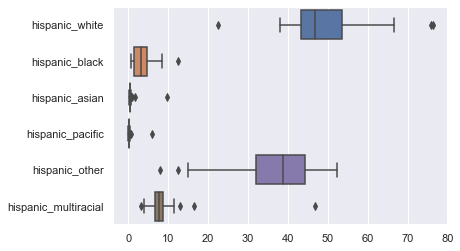

In [19]:
# Import seaborn
import seaborn as sns
sns.set()

# Create a boxplot
sns.boxplot(data = states_hr, orient = "h")

In [20]:
# State with largest % identifying as White
print(states_hr.nlargest(1, 'hispanic_white').squeeze())

# State with smallest % identifying as Some Other Race
print(states_hr.nsmallest(1, 'hispanic_other').squeeze())

# State with largest % identifying as Asian
print(states_hr.nlargest(1, 'hispanic_asian').squeeze())

hispanic_white          76.339680
hispanic_black           3.521989
hispanic_asian           0.227402
hispanic_pacific         0.060633
hispanic_other          14.978955
hispanic_multiracial     4.298564
Name: 9, dtype: float64
hispanic_white          75.862495
hispanic_black          12.385538
hispanic_asian           0.105762
hispanic_pacific         0.007944
hispanic_other           7.831978
hispanic_multiracial     3.277334
Name: 39, dtype: float64
hispanic_white          22.555072
hispanic_black           1.257841
hispanic_asian           9.751576
hispanic_pacific         5.958193
hispanic_other          12.493173
hispanic_multiracial    46.874431
Name: 11, dtype: float64


### The Basic API Request

In [21]:
import requests
# Build base URL
HOST = "https://api.census.gov/data"
year = "2010"
dataset = "dec/sf1"
base_url = "/".join([HOST, year, dataset])

# Specify variables and other predicates
get_vars = ["NAME", "P013001", "P037001"]
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "state:*"

# Execute the request, examine text of response object
r = requests.get(base_url, params=predicates)
print(r.text)

[["NAME","P013001","P037001","state"],
["Alabama","37.9","3.02","01"],
["Alaska","33.8","3.21","02"],
["Arizona","35.9","3.19","04"],
["Arkansas","37.4","3.00","05"],
["California","35.2","3.45","06"],
["Louisiana","35.8","3.10","22"],
["Kentucky","38.1","2.98","21"],
["Colorado","36.1","3.08","08"],
["Connecticut","40.0","3.08","09"],
["Delaware","38.8","3.06","10"],
["District of Columbia","33.8","3.01","11"],
["Florida","40.7","3.01","12"],
["Georgia","35.3","3.17","13"],
["Hawaii","38.6","3.42","15"],
["Idaho","34.6","3.16","16"],
["Illinois","36.6","3.20","17"],
["Indiana","37.0","3.05","18"],
["Iowa","38.1","2.97","19"],
["Kansas","36.0","3.06","20"],
["Maine","42.7","2.83","23"],
["Maryland","38.0","3.15","24"],
["Massachusetts","39.1","3.08","25"],
["Michigan","38.9","3.05","26"],
["Minnesota","37.4","3.05","27"],
["Mississippi","36.0","3.11","28"],
["Missouri","37.9","3.00","29"],
["Montana","39.8","2.91","30"],
["Nebraska","36.2","3.04","31"],
["Nevada","36.3","3.20","32"],
[

### The API Response and Pandas

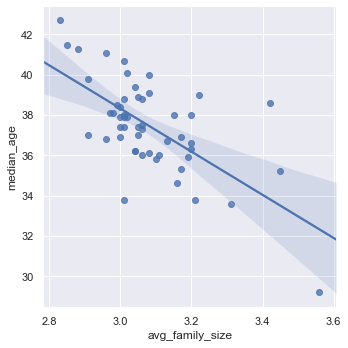

In [8]:
# Import seaborn
import seaborn as sns
sns.set()

# Construct the data frame
col_names = ['name', 'median_age', 'avg_family_size', 'state']
states = pd.DataFrame(columns = col_names, data = r.json()[1:])

# Convert each column with numeric data to an appropriate type
states["median_age"] = states["median_age"].astype('float')
states["avg_family_size"] = states["avg_family_size"].astype('float')

# Scatterplot with regression line
sns.lmplot(x = "avg_family_size", y = "median_age", data = states)
plt.show()

### API to Visualization: Group Quarters

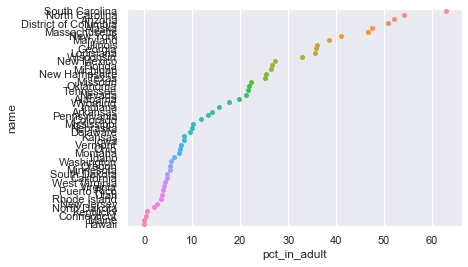

In [9]:
# Specify variables and execute API request
get_vars = ["NAME", "PCT021005", "PCT021015"]
predicates["get"] = ",".join(get_vars)
r = requests.get(base_url, params=predicates)

# Construct data frame
col_names = ["name", "in_adult", "in_juvenile", "state"]
states = pd.DataFrame(columns=col_names, data=r.json()[1:])
states[["in_adult", "in_juvenile"]] = states[["in_adult", "in_juvenile"]].astype(int)

# Calculate percentage of incarcerated male minors in adult facilities
states["pct_in_adult"] = 100 * states["in_adult"] / (states["in_adult"] + states["in_juvenile"])
states.sort_values(by = "pct_in_adult", ascending = False, inplace = True)
sns.stripplot(x = "pct_in_adult", y = "name", data = states)
plt.show()

### Specific Places

In [10]:
# Build dictionary of predicates
get_vars = ["NAME", "P001001"] # <- total population
predicates = {}
predicates["get"] = ",".join(get_vars)
predicates["for"] = "place:60000,61000"
predicates["in"] = "state:42"

# Execute the request
r = requests.get(base_url, params=predicates)

# Show the response text
print(r.text)

[["NAME","P001001","state","place"],
["Philadelphia city, Pennsylvania","1526006","42","60000"],
["Pittsburgh city, Pennsylvania","305704","42","61000"]]


### Congressional Districts by State

In [11]:
# Build dictionary of predicates and execute the request
predicates["for"] = "congressional district:*"
predicates["in"] = "state:42"
r = requests.get(base_url, params=predicates)

# Construct the data frame
col_names = ["name", "avg_family_size", "state", "cd"]
cd = pd.DataFrame(columns=col_names, data=r.json()[1:])

# Print the head of the "avg_family_size" column
display(cd["avg_family_size"].head())

# Set data type and print
cd["avg_family_size"] = cd["avg_family_size"].astype(float)
cd.head()

0    655146
1    630277
2    640356
3    647418
4    651762
Name: avg_family_size, dtype: object

,name,avg_family_size,state,cd
0,"Congressional District 1 (111th Congress), Pen...",655146.0,42,01
1,"Congressional District 2 (111th Congress), Pen...",630277.0,42,02
2,"Congressional District 3 (111th Congress), Pen...",640356.0,42,03
3,"Congressional District 4 (111th Congress), Pen...",647418.0,42,04
4,"Congressional District 5 (111th Congress), Pen...",651762.0,42,05


### Zip Code Tabulation Areas

In [12]:
# Build dictionary of predicates and execute the request
predicates = {}
predicates["get"] = ",".join(["NAME",  "P001001"])
predicates['for'] = 'zip code tabulation area (or part):*'
predicates['in'] ='state:01'
r = requests.get(base_url, params=predicates)

# Construct the data frame
col_names = ["name", "total_pop", "state", "zcta"]
zctas = pd.DataFrame(columns=col_names, data=r.json()[1:])
zctas["total_pop"] = zctas["total_pop"].astype(int)

# Set multilevel index from GEOIDs and print the head
zctas.set_index(['state', 'zcta'], inplace = True)
display(zctas.head())

name  total_pop
state zcta                                         
01    30165  ZCTA5 30165 (part), Alabama         70
      31905  ZCTA5 31905 (part), Alabama          9
      35004         ZCTA5 35004, Alabama      10427
      35005         ZCTA5 35005, Alabama       7942
      35006         ZCTA5 35006, Alabama       3121

## American Community Survey

### Home Values in California

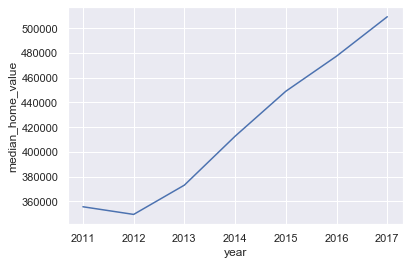

In [13]:
col_names = ['name', 'median_home_value', 'state']
HOST = 'https://api.census.gov/data'
dataset = 'acs/acs1'
predicates = {'for': 'state:06', 'get': 'NAME,B25077_001E'}
dfs = []
# Loop over years 2011 to 2017
for year in range(2011, 2018):
    base_url = "/".join([HOST, str(year), dataset])
    r = requests.get(base_url, params=predicates)
    df = pd.DataFrame(columns=col_names, data=r.json()[1:])    
    # Add column to df to hold year value, append df to collector dfs
    df['year'] = year
    dfs.append(df)

# Concatenate all data frames, fix column type
states = pd.concat(dfs)
states["median_home_value"] = states["median_home_value"].astype(int)

sns.lineplot(x = 'year', y = 'median_home_value', data = states)
plt.show()

### Health Insurance Coverage

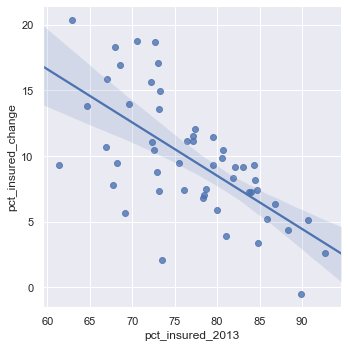

In [14]:
states = pd.read_csv('B27022.csv')
# Calculate percent insured
states["insured_total"] = states["m_school_insured"] +  states["m_noschool_insured"] + states["f_school_insured"] + states["f_noschool_insured"]
states["pct_insured"] = 100 * states["insured_total"] / states["total"]

# Pivot the table and rename the columns
states_pvt = states.pivot(index = "state", columns = "year", values = "pct_insured")
states_pvt.columns = ["pct_insured_2013", "pct_insured_2017"]

# Calculate the change in insurance rates 2013 to 2017
states_pvt["pct_insured_change"] = states_pvt["pct_insured_2017"] - states_pvt["pct_insured_2013"]

# Plot the change against initial (2013) insurance rates
sns.lmplot(x = "pct_insured_2013", y = "pct_insured_change", data = states_pvt)
plt.show()

### Finding ACS Tables by Subject

Search "MOVERS BETWEEN REGIONS IN THE UNITED STATES" the web page at https://api.census.gov/data/2017/acs/acs1/groups.html?

### Plotting Margins of Error over Time

In [15]:
l = [[142000, 4279, '42', '101', 2011, 3.0133802816901407], [142300, 5229, '42', '101', 2012, 3.67463106113844], [136800, 4267, '42', '101', 2013, 3.1191520467836256], [148700, 3778, '42', '101', 2014, 2.5406859448554138], [150700, 3375, '42', '101', 2015, 2.2395487723954877], [154000, 3156, '42', '101', 2016, 2.0493506493506493], [166200, 3549, '42', '101', 2017, 2.1353790613718413]]
philly = pd.DataFrame(l, columns = ['median_home_value', 'median_home_value_moe', 'state', 'county', 'year','rmoe'])

   median_home_value  median_home_value_moe state county  year      rmoe
0             142000                   4279    42    101  2011  3.013380
1             142300                   5229    42    101  2012  3.674631
2             136800                   4267    42    101  2013  3.119152
3             148700                   3778    42    101  2014  2.540686
4             150700                   3375    42    101  2015  2.239549
5             154000                   3156    42    101  2016  2.049351
6             166200                   3549    42    101  2017  2.135379


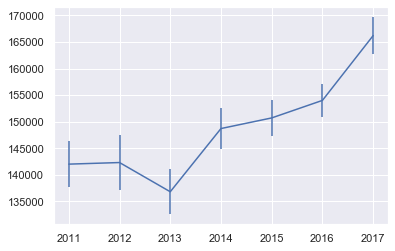

In [16]:
# Import graphics packages
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# Calculate and inspect Relative Margin of Error
philly["rmoe"] = 100 * philly['median_home_value_moe'] / philly['median_home_value']
print(philly)

# Create line plot with error bars of 90% MOE
plt.errorbar('year','median_home_value', yerr = 'median_home_value_moe', data = philly)
plt.show()

### Significance of Difference of Estimates

In [17]:
import math
# Set the critical Z score for 90% confidence, prepare message
Z_CRIT = 1.645
msg = "Philadelphia median home values in {} were {}significantly different from {}."
for year in range(2012, 2018):
    # Assign current and prior year's median home value to variables
    x1 = int(philly[philly["year"] == year]["median_home_value"])
    x2 = int(philly[philly["year"] == year - 1]["median_home_value"])
    
    # Calculate standard error as 90% MOE / critical Z score
    se_x1 = float(philly[philly["year"] == year]["median_home_value_moe"] / Z_CRIT)
    se_x2 = float(philly[philly["year"] == year - 1]["median_home_value_moe"] / Z_CRIT)
    
    # Calculate two-sample z-statistic, output message if greater than critical Z score
    z = (x1 - x2) / math.sqrt(se_x1**2 + se_x2**2)
    print(msg.format(year, "" if abs(z) > Z_CRIT else "not ", year - 1))

Philadelphia median home values in 2012 were not significantly different from 2011.
Philadelphia median home values in 2013 were not significantly different from 2012.
Philadelphia median home values in 2014 were significantly different from 2013.
Philadelphia median home values in 2015 were not significantly different from 2014.
Philadelphia median home values in 2016 were not significantly different from 2015.
Philadelphia median home values in 2017 were significantly different from 2016.


### Significance of Difference of Proportions

In [18]:
l = [[306801, 5723, 9669, 1400, '11', 2011, 0.03151554264816608, 851.063829787234, 3479.0273556231004, 0.00275087610382011], [326143, 6312, 13493, 2422, '11', 2012, 0.04137142296477312, 1472.340425531915, 3837.082066869301, 0.0044880851505348165], [330087, 4834, 14986, 2071, '11', 2013, 0.04540015208111801, 1258.966565349544, 2938.6018237082067, 0.0037925689486727307], [343062, 5802, 13330, 1709, '11', 2014, 0.03885595023640042, 1038.9057750759878, 3527.0516717325227, 0.0030018680347526565], [358150, 4914, 14718, 1816, '11', 2015, 0.04109451347200894, 1103.951367781155, 2987.2340425531916, 0.0030632549658575594], [362204, 5623, 16647, 1823, '11', 2016, 0.04596028757274906, 1108.206686930091, 3418.2370820668693, 0.003028719808159128], [375380, 6102, 18624, 2587, '11', 2017, 0.049613724758910974, 1572.644376899696, 3709.4224924012155, 0.004160687146145248]]
dc = pd.DataFrame(l, columns = ['total_est', 'total_moe', 'bike_est', 'bike_moe', 'state', 'year','bike_share', 'se_bike', 'se_total', 'se_p'])

In [19]:
from numpy import sqrt
# Set the critical Z score for 90% confidence
Z_CRIT = 1.645

# Calculate share of bike commuting
dc["bike_share"] = dc["bike_est"] / dc["total_est"]

# Calculate standard errors of the estimate from MOEs
dc["se_bike"] = dc["bike_moe"] / Z_CRIT
dc["se_total"] = dc["total_moe"] / Z_CRIT
dc["se_p"] = sqrt(dc["se_bike"]**2 - dc["bike_share"]**2 * dc["se_total"]**2) / dc["total_est"]

# Calculate the two sample statistic between 2011 and 2017
Z = (dc[dc["year"] == 2017]["bike_share"] - dc[dc["year"] == 2011]["bike_share"]) / \
    sqrt(dc[dc["year"] == 2017]["se_p"]**2 + dc[dc["year"] == 2011]["se_p"]**2)
print(Z_CRIT < Z)

0    False
6    False
dtype: bool


### Choropleth Map of Internet Access

In [20]:
# Import geopandas
import geopandas as gpd

# Load geospatial data
geo_state = gpd.read_file("states_internet.gpkg")


geo_state.head()

,state,postal,name,total,internet,dial_up,broadband,satellite,other_service,internet_without_subscription,no_internet,label_x,label_y,geometry
0,06,CA,California,12888128,10708603,68137,9292907,783387,153121,375887,1803638,-1.708049e+06,-667730.621773,(POLYGON ((-1716661.572795197 -1091585.2669098...
1,08,CO,Colorado,2082531,1760603,14444,1497662,147847,26520,68598,253330,-4.795022e+05,-650958.512053,(POLYGON ((-787764.8711845676 -679501.90042785...
2,11,DC,District of Columbia,277985,216694,1037,195033,8542,3006,12719,48572,1.960213e+06,-403256.083210,(POLYGON ((1950824.825659711 -402441.066172522...
3,16,ID,Idaho,609124,476141,6054,365151,62011,9683,26236,106747,-1.153546e+06,32306.322359,(POLYGON ((-1357254.591159301 77405.1771214068...
4,17,IL,Illinois,4818452,3806191,29112,3221458,271254,59063,174194,838067,9.171852e+05,-491248.597877,(POLYGON ((720437.1241238854 -496471.759394428...


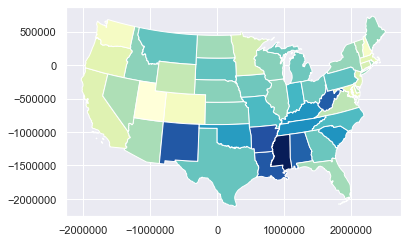

In [21]:
# Calculate percent of households with no internet
geo_state["pct_no_internet"] = 100 * geo_state['no_internet'] / geo_state['total']

# Create choropleth map using YlGnBu colormap
geo_state.plot(column = "pct_no_internet", cmap = 'YlGnBu')
plt.show()

### Proportional Symbol Map of Households w/ Internet

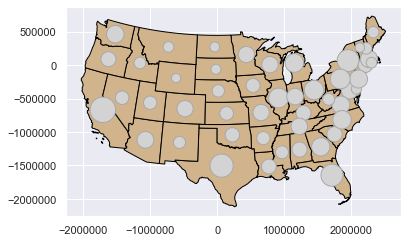

In [22]:
from numpy import sqrt
# Create point GeoDataFrame at centroid of states
geo_state_pt = geo_state.copy()
geo_state_pt["geometry"] = geo_state_pt.centroid

# Set basemap and create variable for markersize
basemap = geo_state.plot(color = 'tan', edgecolor = 'black')
ms = sqrt(geo_state_pt["internet"]) / 5

# Plot proportional symbols on top of basemap
geo_state_pt.plot(ax = basemap, markersize = ms, color = "lightgray", edgecolor = "darkgray")
plt.show()

### Bivariate Map of Broadband Access

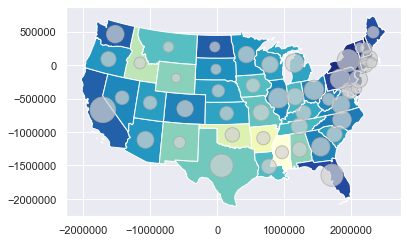

In [23]:
# Create point GeoDataFrame at centroid of states
geo_state_pt = geo_state.copy()
geo_state_pt["geometry"] = geo_state_pt.centroid

# Calculate percentage of internet households with broadband
geo_state["pct_broadband"] = 100 * geo_state["broadband"] / geo_state["internet"]

# Set choropleth basemap
basemap = geo_state.plot(column = "pct_broadband", cmap = "YlGnBu")

# Plot transparent proportional symbols on top of basemap
geo_state_pt.plot(ax = basemap, markersize = sqrt(geo_state["internet"]) / 5, color = "lightgray", edgecolor = "darkgray", alpha = 0.7)
plt.show()

### Identifying Gentrifiable Tracts

In [24]:
df1 = gpd.read_file('brooklyn_tract_2000.gpkg')
df1.head()

,state,county,tract,geometry
0,36,047,051200,(POLYGON ((994216.2898478177 174053.2677924191...
1,36,047,051300,"(POLYGON ((996457.9298599585 197995.791029398,..."
2,36,047,051400,(POLYGON ((995928.0301860854 173957.8474157724...
3,36,047,051500,(POLYGON ((998421.4540602234 202066.7940151255...
4,36,047,051600,(POLYGON ((996940.7992289109 172126.5176300558...


In [25]:
df2 = pd.read_pickle('tracts_brooklyn_2000.pickle')
df2.head()

,mhi,mhi_msa,median_value,median_value_msa,state,county,tract,pct_recent_build,pct_recent_build_msa,pct_ba,pct_ba_msa
0,63333,50795,167400,203100,36,047,000100,2.500000,15.595939,56.975353,30.500175
1,29219,50795,325000,203100,36,047,000200,1.600000,15.595939,3.428571,30.500175
2,83739,50795,377500,203100,36,047,000301,0.000000,15.595939,71.039545,30.500175
3,112414,50795,362500,203100,36,047,000302,0.000000,15.595939,70.833333,30.500175
4,65013,50795,217700,203100,36,047,000500,1.122129,15.595939,77.942046,30.500175


In [26]:
bk_2000 = pd.merge(df1, df2, how = 'left', on = ['state', 'county', 'tract'])
bk_2000.head()

,state,county,tract,geometry,mhi,mhi_msa,median_value,median_value_msa,pct_recent_build,pct_recent_build_msa,pct_ba,pct_ba_msa
0,36,047,051200,(POLYGON ((994216.2898478177 174053.2677924191...,31393,50795,535700,203100,2.927450,15.595939,11.550750,30.500175
1,36,047,051300,"(POLYGON ((996457.9298599585 197995.791029398,...",30000,50795,221900,203100,10.153846,15.595939,16.188374,30.500175
2,36,047,051400,(POLYGON ((995928.0301860854 173957.8474157724...,32103,50795,278200,203100,2.212223,15.595939,16.514161,30.500175
3,36,047,051500,(POLYGON ((998421.4540602234 202066.7940151255...,36107,50795,258800,203100,4.025424,15.595939,18.810289,30.500175
4,36,047,051600,(POLYGON ((996940.7992289109 172126.5176300558...,25148,50795,169800,203100,2.486016,15.595939,8.033749,30.500175


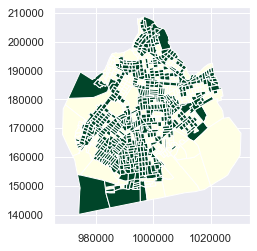

In [27]:
# Median income below MSA median income
bk_2000["low_mhi"] = bk_2000["mhi"] < bk_2000["mhi_msa"]

# Recent construction below MSA
bk_2000["low_recent_build"] = bk_2000['pct_recent_build'] < bk_2000['pct_recent_build_msa']

# Identify gentrifiable tracts
bk_2000["gentrifiable"] = (bk_2000["low_mhi"]) & (bk_2000["low_recent_build"])

# Plot gentrifiable tracts
bk_2000.plot(column = 'gentrifiable', cmap = 'YlGn')
plt.show()

### Identifying Gentrifying Neighborhoods

In [28]:
df1 = gpd.read_file('brooklyn_tract_2010.gpkg')
df1.head()

,state,county,tract,geometry
0,36,047,072600,(POLYGON ((1001931.195361766 170524.4096475212...
1,36,047,120200,"(POLYGON ((1020622.83497172 186009.8272078811,..."
2,36,047,054600,(POLYGON ((996857.9875351689 163766.6341270409...
3,36,047,122000,(POLYGON ((1020072.790278073 182440.0443001355...
4,36,047,121400,(POLYGON ((1021031.579621558 182965.7456284627...


In [29]:
df2 = pd.read_pickle('tracts_brooklyn_2010.pickle')
df2.head()

,mhi,mhi_msa,median_value_2000,median_value_msa,state,county,tract,pct_recent_build,pct_recent_build_msa,pct_ba_2000,pct_ba_msa_2000,median_value_2010,pct_ba_2010,pct_ba_msa_2010
0,63333.0,50795.0,167400.0,203100.0,36,047,000100,2.5,15.595939,56.975353,30.500175,608700,71.424760,36.263065
1,29219.0,50795.0,325000.0,203100.0,36,047,000200,1.6,15.595939,3.428571,30.500175,488600,5.997392,36.263065
2,83739.0,50795.0,377500.0,203100.0,36,047,000301,0.0,15.595939,71.039545,30.500175,718600,78.648276,36.263065
3,66213.0,50795.0,584700.0,203100.0,36,047,000700,0.0,15.595939,78.025811,30.500175,1000001,84.413370,36.263065
4,79201.0,50795.0,285000.0,203100.0,36,047,000900,0.0,15.595939,75.478261,30.500175,620900,84.143302,36.263065


In [30]:
bk_2010 = pd.merge(df1, df2, how = 'left', on = ['state', 'county', 'tract'])
bk_2010.head()

,state,county,tract,geometry,mhi,mhi_msa,median_value_2000,median_value_msa,pct_recent_build,pct_recent_build_msa,pct_ba_2000,pct_ba_msa_2000,median_value_2010,pct_ba_2010,pct_ba_msa_2010
0,36,047,072600,(POLYGON ((1001931.195361766 170524.4096475212...,65163.0,50795.0,191100.0,203100.0,1.552393,15.595939,24.529486,30.500175,410500,35.614035,36.263065
1,36,047,120200,"(POLYGON ((1020622.83497172 186009.8272078811,...",35741.0,50795.0,169600.0,203100.0,0.000000,15.595939,10.329068,30.500175,452000,19.230769,36.263065
2,36,047,054600,(POLYGON ((996857.9875351689 163766.6341270409...,35469.0,50795.0,327900.0,203100.0,0.355691,15.595939,37.211508,30.500175,583900,39.986649,36.263065
3,36,047,122000,(POLYGON ((1020072.790278073 182440.0443001355...,25807.0,50795.0,203900.0,203100.0,64.356436,15.595939,11.813760,30.500175,572100,16.986817,36.263065
4,36,047,121400,(POLYGON ((1021031.579621558 182965.7456284627...,8927.0,50795.0,291700.0,203100.0,0.000000,15.595939,3.221477,30.500175,-666666666,1.707780,36.263065


In [31]:
# Median income below MSA median income
bk_2010["low_mhi"] = bk_2010["mhi"] < bk_2010["mhi_msa"]

# Recent construction below MSA
bk_2010["low_recent_build"] = bk_2010['pct_recent_build'] < bk_2010['pct_recent_build_msa']

# Identify gentrifiable tracts
bk_2010["gentrifiable"] = (bk_2010["low_mhi"]) & (bk_2010["low_recent_build"])

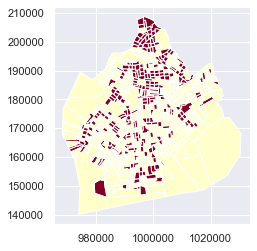

In [32]:
# Increase in percent BA greater than MSA
bk_2010["increasing_education"] = (bk_2010["pct_ba_2010"] - bk_2010["pct_ba_2000"]) > (bk_2010["pct_ba_msa_2010"] - bk_2010["pct_ba_msa_2000"])

# Increase in house value
bk_2010["increasing_house_value"] = bk_2010["median_value_2010"] > bk_2010["median_value_2000"] * 1.2612

# Identify gentryifying tracts
bk_2010["gentrifying"] = bk_2010["gentrifiable"] & bk_2010["increasing_education"] & bk_2010["increasing_house_value"]

# Plot gentrifying tracts
bk_2010.plot(column = "gentrifying", cmap = "YlOrRd")
plt.show()

### Mapping Gentrification

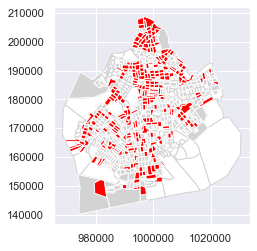

In [33]:
# Create a basemap
basemap = bk_2000.plot(color = "white", edgecolor = "lightgray")

# Filter and plot gentrifiable tracts
gentrifiable_tracts = bk_2000[bk_2000["gentrifiable"]]
gentrifiable_tracts.plot(ax = basemap, color = "lightgray")

# Filter and plot gentrifying tracts
gentrifying_tracts = bk_2010[bk_2010["gentrifying"]]
gentrifying_tracts.plot(ax = basemap, color = "red")
plt.show()

## Measuring Segregation

### Calculating D for One State

In [ ]:
# Define convenience variables to hold column names
w = "white"
b = "black"

# Extract Georgia tracts
ga_tracts = tracts[tracts["state"] == "13"]

# Print sums of Black and White residents of Georgia
print(ga_tracts[[w, b]].sum())

# Calculate Index of Dissimilarity and print rounded result
D = 0.5 * sum(abs(
  ga_tracts[w] / ga_tracts[w].sum() - ga_tracts[b] / ga_tracts[b].sum()))

print("Dissimilarity (Georgia):",round(D, 3))

### Calculating D in a Loop

In [ ]:
# Get list of state FIPS Codes
states = list(tracts["state"].unique())

state_D = {}  # Initialize dictionary as collector
for state in states:
    # Filter by state
    tmp = tracts[tracts["state"] == state]
    
    # Add Index of Dissimilarity to Dictionary
    state_D[state] = 0.5 * sum(abs(tmp[w] / tmp[w].sum() - tmp[b] / tmp[b].sum()))

# Print D for Georgia (FIPS = 13) and Illinois (FIPS = 17)    
print("Georgia D =", round(state_D["13"], 2))
print("Illinois D =", round(state_D["17"], 2))

### Calculating D Using Grouping in Pandas

In [ ]:
# Sum Black and White residents grouped by state
sums_by_state = tracts.groupby("state")[[w, b]].sum()
print(sums_by_state.head())

# Merge the sum with the original tract populations
tracts = pd.merge(tracts, sums_by_state, left_on = "state", 
    right_index = True, suffixes = ("", "_sum"))
print(tracts.head())

# Calculate inner expression of Index of Dissimilarity formula
tracts["D"] = abs(tracts['white'] / tracts["white" + "_sum"] - tracts['black'] / tracts["black" + "_sum"])

# Calculate the Index of Dissimilarity
print(0.5 * tracts.groupby('state')["D"].sum())

### Joining Tracts and Metropolitan Areas

In [ ]:
# Find identifiers for 50 largest metros by population
msa50 = list(msa.nlargest(50, "population")["msa"])

# Join MSA identifiers to tracts, restrict to largest 50 metros
msa_tracts = pd.merge(tracts, msa_def, on = ["state", "county"])
msa_tracts = msa_tracts[msa_tracts["msa"].isin(msa50)]

# Calculate D using custom function, merge back into MSA
msa_D = dissimilarity(msa_tracts, "white", "black", "msa")
msa = pd.merge(msa, msa_D, left_on = "msa", right_index = True)

# Plot five most segregated metros
sns.stripplot(x = "D", y = "name", data = msa.nlargest(10, "D"))
plt.show()

### Create Function to Calculate D

In [ ]:
def dissimilarity(df, col_A, col_B, group_by):

    # Sum Group A and Group B by grouping column
    grouped_sums = df.groupby(group_by)[[col_A, col_B]].sum()
    tmp = pd.merge(df, grouped_sums, left_on = group_by, 
                   right_index = True, suffixes = ("", "_sum"))
    
    # Calculate inner expression
    tmp["D"] = abs(tmp[col_A]/tmp[col_A + "_sum"] - tmp[col_B]/tmp[col_B + "_sum"])
    
    # Calculate Index of Dissimilarity and convert to data frame
    return 0.5 * tmp.groupby(group_by)["D"].sum().to_frame()
  
msa_D = dissimilarity(msa_tracts, "white", "black", "msa_name")
print(msa_D.head())

### Characteristics of Segregated Metros

In [ ]:
# Are large metros more segregated?
sns.lmplot(x = 'population', y = 'D', data = msa)
plt.show()

# Calculate percentage African-American
msa["black_pct"] = msa['black'] / msa['population'] *100

# Are more diverse metros more segregated?
sns.lmplot('black_pct', 'D', data = msa)
plt.show()

# Display metro size, percent Black, and segregation in one plot
sns.scatterplot('black_pct', 'D', size = 'population', hue = 'population', data = msa)
plt.show()

### Calculating Unemployment

In [ ]:
## View the first few rows of msa_black_emp
#print(msa_black_emp.head())

# Calculate percentage unemployment for male, female, and all
msa_black_emp["pct_male_unemp"] = 100 * msa_black_emp["male_unemp"] / msa_black_emp["male_lf"]
msa_black_emp["pct_female_unemp"] = 100 * msa_black_emp["female_unemp"] / msa_black_emp["female_lf"]
msa_black_emp["pct_unemp"] = 100 * (msa_black_emp["female_unemp"] + msa_black_emp["male_unemp"]) / (msa_black_emp["female_lf"] + msa_black_emp["male_lf"])

# Merge with Index of Dissimilarity calculated previously
msa_black_emp = pd.merge(msa, msa_black_emp, on = "msa")

# Plot unemployment vs. segregation
sns.lmplot(x = 'D', y = 'pct_unemp', data = msa_black_emp)
plt.show()

### Impacts of Black-White Segregation by Sex

In [ ]:
# Restrict data frame to columns of interest, rename columns
tidy_black_emp = msa_black_emp[["msa", "D", "pct_male_unemp", "pct_female_unemp"]]
tidy_black_emp.columns = ["msa", "D", "male", "female"]

# Use melt to create tidy data frame, and view the first few rows
tidy_msa_emp = tidy_black_emp.melt(id_vars = ["msa", "D"], 
    value_vars = ["male", "female"], var_name = "sex", 
    value_name = "unemployment")

# Visually compare male and female unemployment
sns.lmplot('D', 'unemployment', hue = 'sex', data = tidy_msa_emp)
plt.show()

### White and Black Unemployment

In [ ]:
# Restrict data frame to columns of interest, rename columns
tidy_black_emp = msa_black_emp[["msa", "D", "pct_male_unemp"]]
tidy_black_emp.columns = ["msa", "D", "black"]
tidy_white_emp = msa_white_emp[["msa", "pct_male_unemp"]]
tidy_white_emp.columns = ["msa", "white"]
tidy_emp = pd.merge(tidy_black_emp, tidy_white_emp, on = 'msa')

# Use melt to create tidy data frame
tidy_msa_emp = tidy_emp.melt(id_vars = ["msa", "D"], 
    value_vars = ['white', 'black'], var_name = 'race', 
    value_name = 'unemployment')

# Visually compare male and female unemployment
sns.lmplot('D', 'unemployment',hue = 'race', data = tidy_msa_emp)
plt.show()

### Tract Demographics in a Segregated City

In [ ]:
# Calculate percent Black in 2010
tracts_cook["pct_black_2010"] = 100 * tracts_cook["black_2010"] / tracts_cook["totalpop_2010"]

# Examine histogram of percent Black
sns.distplot(tracts_cook["pct_black_2010"], kde = False)
plt.show()

### Segregation Begets More Segregation

In [ ]:
# Calculate percent Black in 1990 and percentage point change from 1990 to 2000
tracts_cook["pct_black_1990"] = 100 * tracts_cook["black_1990"] / tracts_cook["totalpop_1990"]
tracts_cook["pct_black_change"] = tracts_cook["pct_black_2010"] - tracts_cook["pct_black_1990"]

# Retain tracts between 30% and 70% Black in 1990
tracts_mixed = tracts_cook[(tracts_cook["pct_black_1990"] >= 30) & (tracts_cook["pct_black_1990"] <= 70)]

# Plot change vs. percent Black in 1990, with "no change" reference line
sns.regplot(x = "pct_black_1990", y = "pct_black_change", lowess = True, data = tracts_mixed)
plt.plot([30, 70], [0, 0], linestyle = "--", color = "red")
plt.show()

### Population Decline in Segregated Neighborhoods

In [ ]:
# Calculate percent population change 1990-2010
tracts_cook["pct_pop_change"] = 100 * (tracts_cook["totalpop_2010"] - tracts_cook["totalpop_1990"]) / tracts_cook["totalpop_1990"]

# Filter out very high growth census tracts
tracts_change = tracts_cook[tracts_cook["pct_pop_change"] <= 100]

# Plot population change vs. percent Black in 1990
sns.scatterplot(x = "pct_black_1990", y = "pct_pop_change", data = tracts_change)
plt.plot([0, 100], [0, 0], linestyle = "--", color = "red")
plt.show()

## Exploring Census Topics

### Unemployment

In [ ]:
# Rename columns
unemp_by_race.rename(columns = col_rename, inplace = True)
print(unemp_by_race.columns)
# Melt data frame by demographic group
unemp_by_race = unemp_by_race.melt(id_vars = 'year', value_vars = ['white_male', 'white_female', 'black_male', 'black_female',
       'asian_male', 'asian_female', 'hispanic_male', 'hispanic_female'],
    var_name = "demographic", value_name = "pct_unemployed")

# Plot unemployment by group by year
sns.barplot(x = 'year', y = 'pct_unemployed', hue = 'demographic', data = unemp_by_race)
plt.show()

### Labor Force Participation

In [ ]:
# Melt data frame by demographic group
lf_by_race = lf_by_race.melt(
        var_name = 'demographic',
        value_name = 'labor_force_participation',
        id_vars = 'year'
		)

# Plot labor force particpation by group by year
sns.barplot('year', 'labor_force_participation', hue = 'demographic', data= lf_by_race)
plt.show()

### Heatmap of Travel Times By Commute Mode

In [ ]:
# Set iter_len to the number of commute times
iter_len = len(times)

# Break row into list of lists by travel mode
data = [data_row[i:i+iter_len] for i in range(0, len(data_row), iter_len)]

# Create data frame, set data type to int
commuting = pd.DataFrame(data=data, index=modes, columns=times)
commuting = commuting.astype(int)

# Create heatmap of commuters by mode by income
sns.heatmap(commuting, annot=commuting // 1000, fmt = "d", cmap="YlGnBu")
plt.xticks(rotation = 50)
plt.yticks(rotation = 50)
plt.show()

### Worker Population

In [ ]:
# Merge population data with geopandas data frame
geo_nyma = pd.merge(geo_nyma, nyma_counties, on = ["state", "county"])

# Calculate population densities
geo_nyma["worker_density"] = 1000**2 * geo_nyma["worker_pop"] / geo_nyma.area
geo_nyma["residential_density"] = 1000**2 * geo_nyma["residential_pop"] / geo_nyma.area

# Compare residential and worker density plots
fig, axes = plt.subplots(ncols=2)
geo_nyma.plot(column = "residential_density", cmap = "YlGnBu", ax=axes[0])
geo_nyma.plot(column = "worker_density", cmap = "YlGnBu", ax=axes[1])
plt.show()

### Immigration

In [ ]:
# Calculate new immigrants as percent of current population
us_immigration["pct_new_immigrant"] = 100 * us_immigration["new_immigrant"] / us_immigration["total"]

# Create a barplot
sns.barplot(x = "year", y = "pct_new_immigrant", data = us_immigration, color = "cornflowerblue")
plt.show()

### State-to-State Flows

In [ ]:
# Retain only rows and columns of Midwest states
midwest = state_to_state[midwest_states][state_to_state.index.isin(midwest_states)]

# Are rows and columns still in the same order?
print(midwest.index == midwest.columns)

# Sort the rows (by index) and columns (by name)
midwest.sort_index(axis = 0, inplace = True)
midwest.sort_index(axis = 1, inplace = True)

# Create a heatmap of migration flows
sns.heatmap(midwest, cmap = 'YlGnBu')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

### Rent Burden in San Francisco

In [ ]:
# Calculate percentage of rent burdened households
rent_burden = rent[["name"]]
for income in incomes:
    rent_burden[income] = 100 * (rent[income + "_rent_30_to_35_pct"] + 
        rent[income + "_rent_35_to_40_pct"] + rent[income + "_rent_40_to_50_pct"] + 
        rent[income + "_rent_over_50_pct"]) / (rent[income] - rent[income + "_rent_not_computed"])

# Melt the data frame
rent_burden = rent_burden.melt(id_vars = "name", var_name = "income", value_name = "percent_rent_burdened")

# Create a barplot
sns.barplot(x = "income", y = "percent_rent_burdened", hue = "name", data = rent_burden)
plt.xticks(rotation=50)
plt.show()

### High Rent and Rent Burden

In [ ]:
# Merge geometries with rent data
sf_tracts = sf_tracts.merge(sf_rent, on = ["state", "county", "tract"])

# Plot median rent by Census tract
sf_tracts[sf_tracts["median_rent"].notnull()].plot(column = "median_rent", cmap = "YlGnBu")
plt.show()
plt.close()

# Plot median rent as percentage of income
sf_tracts.plot(column = "median_rent_pct_of_income", cmap = "YlGnBu")
plt.show()

# Show correlation between median rent and percent of income
print(sf_tracts["median_rent"].corr(sf_tracts["median_rent_pct_of_income"]))